#Data Cleaning

Untuk detail datanya adalah sebagai berikut:

*   UpdatedAt = Periode of Data taken
*   customerID = Customer ID
*   gender = Whether the customer is a male or a female (Male, Female)
*   SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
*   Partner = Whether the customer has a partner or not (Yes, No)
*   Dependents = Whether the customer has dependents or not (Yes, No)
*   tenure = Number of months the customer has stayed with the company
*   PhoneService =  Whether the customer has a phone service or not (Yes, No)
*   MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
*   InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
*   OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
*   OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
*   DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
*   TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
*   StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
*   StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
*   Contract = The contract term of the customer (Month-to-month, One year, Two year)
*   PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
*   PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   MonthlyCharges = The amount charged to the customer monthly
*   TotalCharges = The total amount charged to the customer
*   Churn = Whether the customer churned or not (Yes or No)

In [ ]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 50
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [ ]:
#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head(50))

#Jumlah ID yang unik
print(df_load.customerID.nunique())

(7113, 22)
    UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0      202006  45759018157  Female              0     Yes         No     1.0   
1      202006  45557574145    Male              0      No         No    34.0   
2      202006  45366876421    Male              0      No         No     2.0   
3      202006  45779536532    Male              0      No         No    45.0   
4      202006  45923787906  Female              0      No         No     2.0   
5      202006  45930534913  Female              0      No         No     8.0   
6      202006  45145219511    Male              0      No        Yes    22.0   
7      202006  45671351533  Female              0      No         No    10.0   
8      202006  45789265516  Female              0     Yes         No    28.0   
9      202006  45638801276    Male              0      No        Yes    62.0   
10     202006  45976378914    Male              0     Yes        Yes    13.0   
11     202006  45746921239   

In [ ]:
"""
Memfilter ID Number Pelanggan dengan Format tertentu
Pelanggan customerID yang benar, dengan kriteria:
1. Panjang karakter adalah 11-12.
2. Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
3. Diawali dengan angka 45 2 digit pertama.
"""

""""
.astype(str) → mengonversi data numeric ke string agar regex bisa bekerja.
.str.match() → mencocokkan dari awal string (beda dengan contains() yang bisa cari di tengah).
45 → wajib diawali dengan angka 45, \d{9,10} → diikuti 9 atau 10 digit angka.
Jadinya 45 + 9 angka = 11 angka atau 45 + 10 angka = 12 angka
"""
#Filter: hanya ambil baris valid_id == True (yang cocok regex).
#Drop: hilangkan kolom valid_id karena sudah tidak dibutuhkan.


df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


In [ ]:
"""
Memfilter Duplikasi ID Number Pelanggan
Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:
1. Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
2. Duplikasi dikarenakan inserting beda periode pengambilan data
"""

# Hapus (drop) baris yang duplikat
#df_load.drop_duplicates()

#df_load[df_load.duplicated(keep=False)]
#df_load[df_load.duplicated(subset='customerID',keep=False)]

# Hapus (drop) duplikat ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',
      df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data



In [ ]:
"""
Mengatasi Missing Values dengan Penghapusan Rows
Selanjutnya kita akan menghapus rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak.
"""

print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())

# Hapus (drop) semua baris yang missing value pada kolom churn
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


In [ ]:
"""
Selain dengan menghapus rows dari data, menangani missing values bisa menggunakan nilai tertentu.
Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:
1. Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi dengan 11.
2. Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.
"""

print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

# Handling missing values Tenure diisi dengan 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values diisi dengan nilai median (selain kolom Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
	median = df_load[col_name].median()
	df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
gender               0
UpdatedAt            0
customerID           0
Dependents           0
Partner              0
SeniorCitizen        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
MultipleLines        0
InternetService      0
TechSupport          0
DeviceProtection     0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
Contract             0
PaymentMethod        0
Churn                0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMo

/tmp/ipython-input-6-2265537894.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)
/tmp/ipython-input-6-2265537894.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


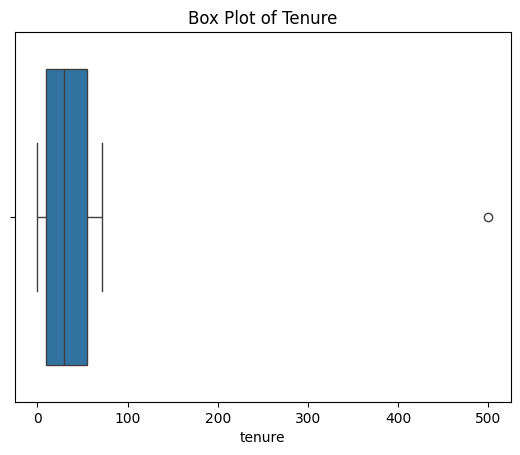

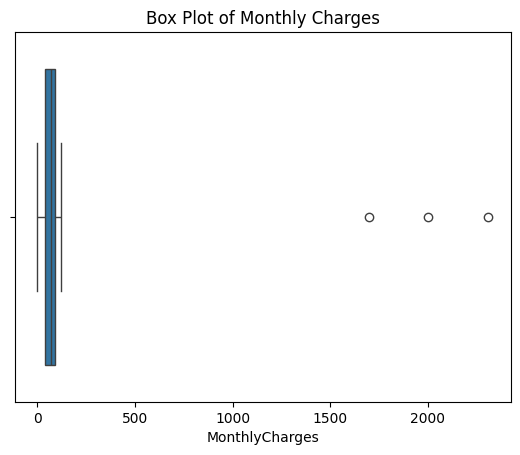

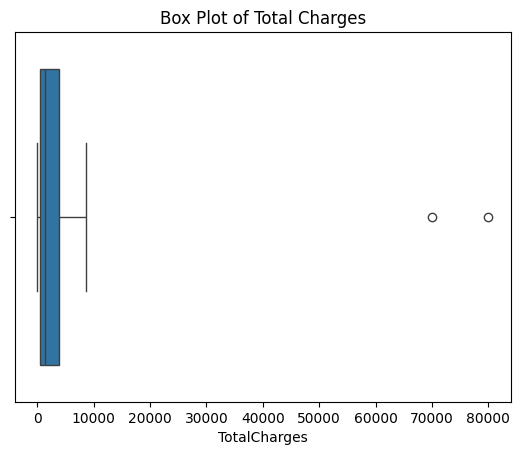

In [ ]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Buat Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk kolom tenure
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.title('Box Plot of Tenure')
plt.show()

# Untuk kolom MonthlyCharges
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.title('Box Plot of Monthly Charges')
plt.show()

# Untuk kolom TotalCharges
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['TotalCharges'])
plt.title('Box Plot of Total Charges')
plt.show()

In [ ]:
# Dari boxplot di atas ketiga kolom (tenure, MonthlyCharges, TotalCharges) terdapat outlier
# Mengatasi outlier dengan IQR
# IQR = Q3 - Q1, yaitu jarak antara kuartil atas dan bawah. Ini digunakan untuk menentukan batas normal data.

# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

# Jadi kalo ada yang lebih dari maximum maka masuk more_than
# Kalo ada yang lebih rendah dari minimum maka masuk lower_than
more_than = (df_load[['tenure','MonthlyCharges','TotalCharges']] > maximum)
lower_than = (df_load[['tenure','MonthlyCharges','TotalCharges']] < minimum)

# mask() untuk mengganti nilai outlier tersebut dengan batas maksimum/minimum yang ditoleransi
df_load[['tenure','MonthlyCharges','TotalCharges']] = df_load[['tenure','MonthlyCharges','TotalCharges']].mask(more_than, maximum, axis=1)
df_load[['tenure','MonthlyCharges','TotalCharges']] = df_load[['tenure','MonthlyCharges','TotalCharges']].mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


In [ ]:
"""
Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard.
Hal ini biasanya terjadi dikarenakan kesalahan input data.
Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.
Gunakan fungsi value_counts() untuk melihat jumlah data unique per variable-nya.
"""
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                      'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                      'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count Before Standardized Variable',col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Partner
Partner
No     3591
Yes    3359
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Dependents
Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Unique Values Count Before Standardized Variable InternetService
InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: count, dtyp

In [ ]:
"""
Setelah kita mengeteahui variable mana saja yang ada nilai tidak standard,
maka kita standardkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya.
Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah.
Gunakan fungsi replace() untuk menstandardkan nilai.
"""

df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
 print('\nUnique Values Count After Standardized Variable',col_name)
 print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
gender
Male      3505
Female    3445
Name: count, dtype: int64

Unique Values Count After Standardized Variable Dependents
Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Unique Values Count After Standardized Variable Churn
Churn
No     5114
Yes    1836
Name: count, dtype: int64


Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:
*   Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan
nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
*   Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
*   Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.

# Customer Churn Prediction Model using Machine Learning

Data yang dibutuhkan dan detailnya:
*   UpdatedAt = Periode of Data taken
*   customerID = Customer ID
*   gender = Whether the customer is a male or a female (Male, Female)
*   SeniorCitizen = Whether the customer is a senior citizen or not (Yes, No)
*   Partner = Whether the customer has a partner or not (Yes, No)
*   tenure = Number of months the customer has stayed with the company
*   PhoneService = Whether the customer has a phone service or not (Yes, No)
*   InternetService = Customer’s internet service provider (Yes, No)
*   StreamingTV = Whether the customer has streaming TV or not (Yes, No)
*   PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
*   MonthlyCharges = The amount charged to the customer monthly
*   TotalCharges = The total amount charged to the customer
*   Churn = Whether the customer churned or not (Yes, No)

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
#df_load.head(5)
print(df_load.shape)


(6950, 13)


## EDA

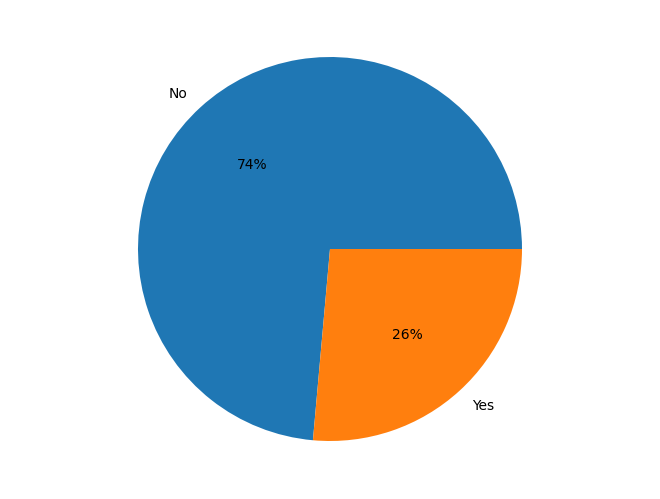

In [2]:
# Melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan
fig = plt.figure() # untuk membuat figure baru
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

Dari pie chart ini menunjukkan bahwa 74% pelanggan tidak melakukan churn, artinya mayoritas pelanggan masih setia atau tetap menggunakan layanan perusahaan.

26% pelanggan melakukan churn, artinya ada sekitar seperempat pelanggan yang berhenti berlangganan.

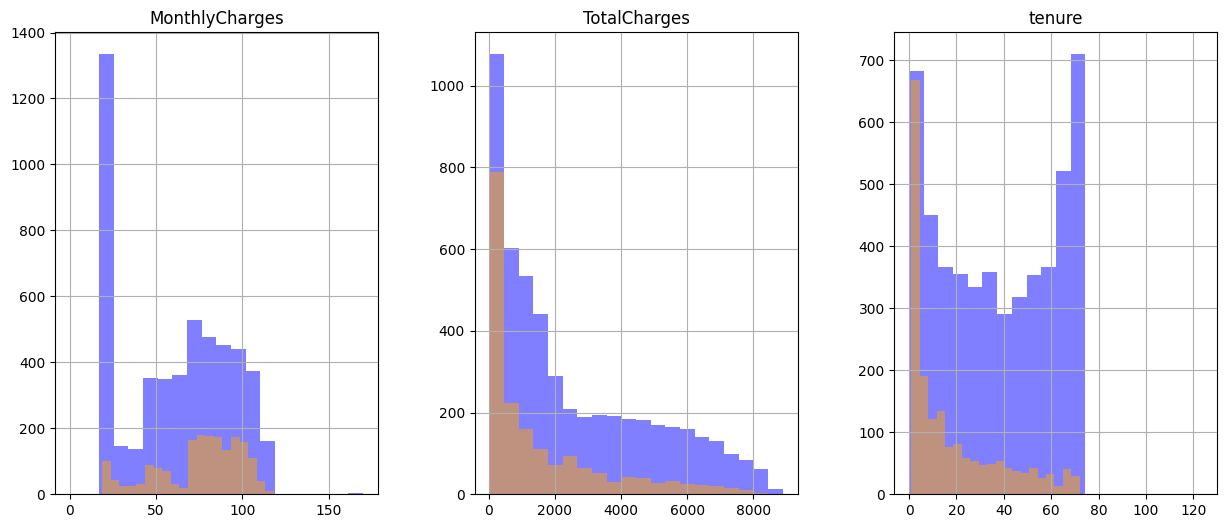

In [3]:
"""
Memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat,
kemudian menginterpretasikannya
"""

#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()


*   MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn
*   TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers
*   tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.








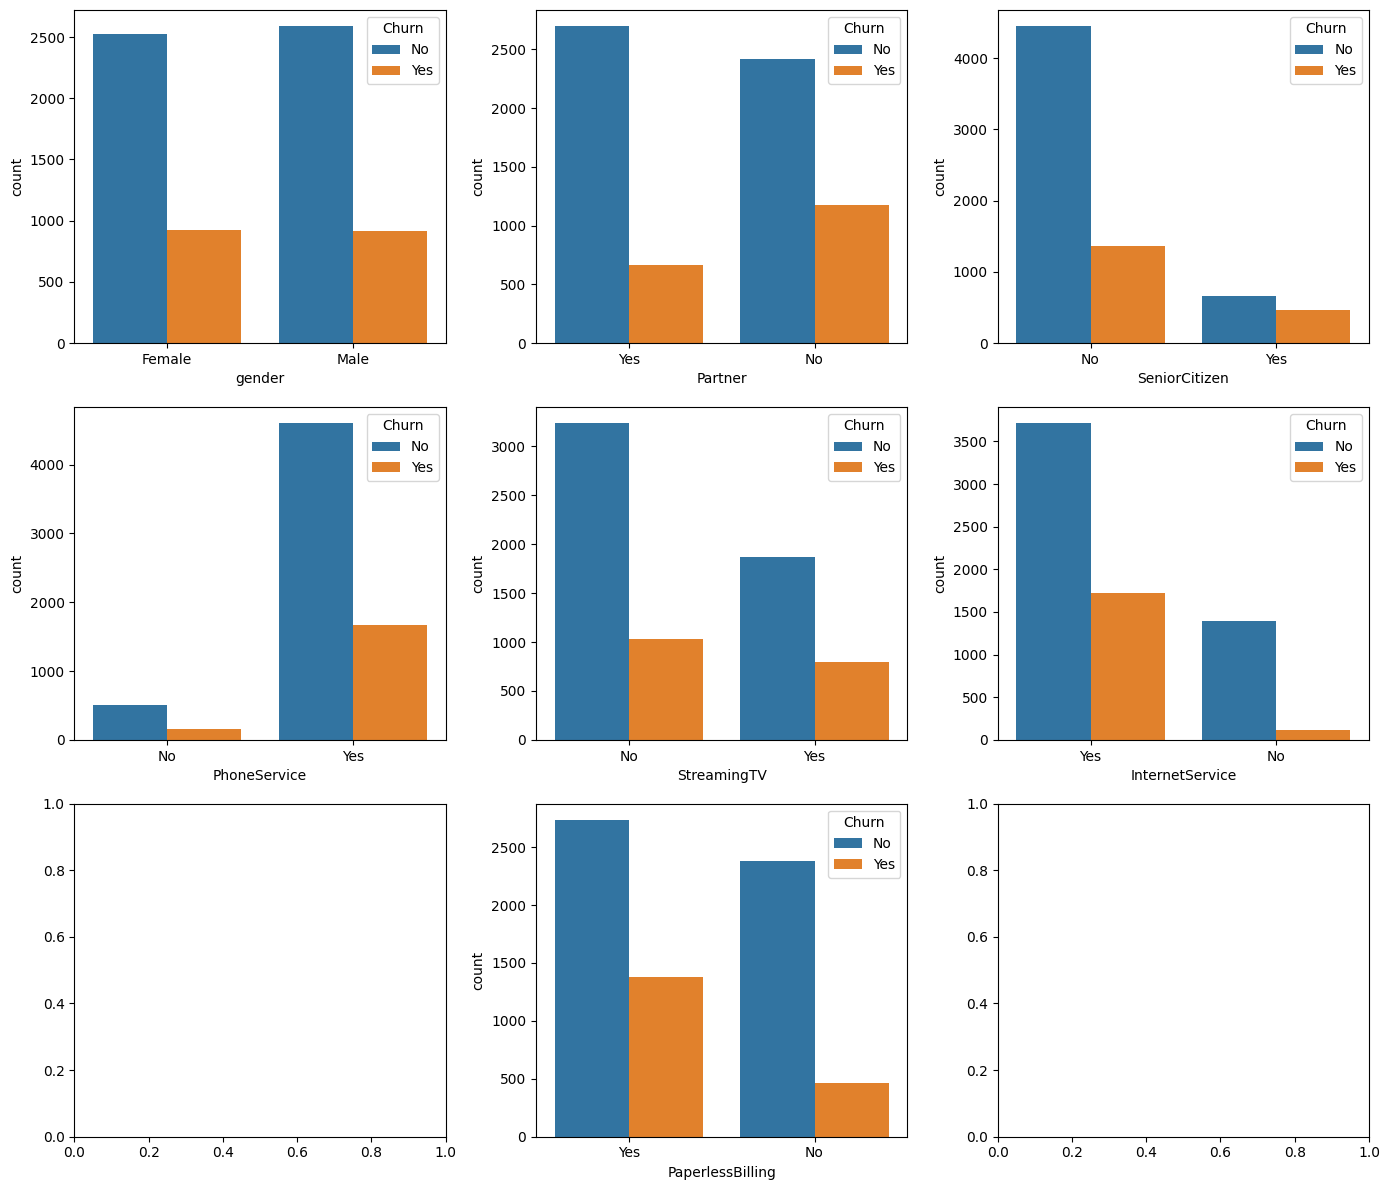

In [4]:
"""
Melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat,
kemudian menginterpretasikannya
"""

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()


*   tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService)

*   ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).



In [5]:
# menghapus kolom yang gak dipake
cleaned_df = df_load.drop(["customerID","UpdatedAt"], axis =1)
print(cleaned_df.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


## Data PreProcessing

In [6]:
print(cleaned_df.describe)
# masih bentuk string maka kita ubah ke numerik

# Dinamakan proses encoding
# konversi semua non numerik menjadi numerik
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # lakukan encoding di setiap kolom non numerik
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

<bound method NDFrame.describe of       gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0     Female            No     Yes       1           No          No   
1       Male            No     Yes      60          Yes          No   
2       Male            No      No       5          Yes         Yes   
3     Female            No     Yes      72          Yes         Yes   
4     Female            No     Yes      56          Yes         Yes   
...      ...           ...     ...     ...          ...         ...   
6945    Male            No      No       1          Yes          No   
6946  Female           Yes      No       1          Yes          No   
6947  Female            No      No       1          Yes         Yes   
6948  Female            No     Yes      72          Yes         Yes   
6949    Male            No      No      64          Yes          No   

     InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0                Yes              Yes

/tmp/ipython-input-6-4063345527.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipython-input-6-4063345527.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipython-input-6-4063345527.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipython-input-6-4063345527.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipython-input-6-4063345527.py:7

In [7]:
# Predictor dan target
x = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


## Modelling: Logistic Regression

In [8]:
#Train the model
log_model = LogisticRegression().fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Performansi Model Training

In [9]:
# Menampilkan Metrics

# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print("Classification Report Training Model (Logistic Regression)")
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression)
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.79      4865



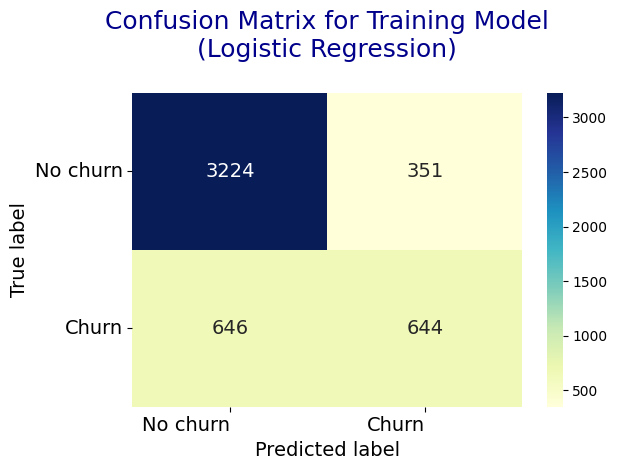

In [10]:
# Menampilkan Plots

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Performansi Model Testing

In [11]:
# Menampilkan Metrics
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print("Classification Report Testing Model (Logistic Regression)")
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression)
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



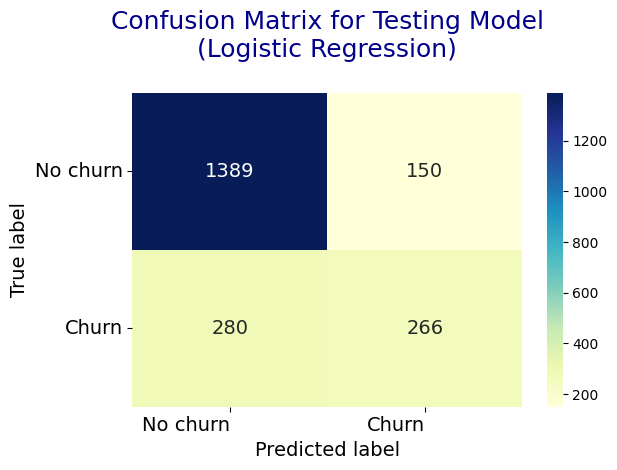

In [12]:
# Menampilkan Plots

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan churn yang sebenernya benar churn adalah 644, tebakan tidak churn yang sebenernya tidak churn adalah 3224, tebakan tidak churn yang sebenernya benar churn adalah 646 dan tebakan churn yang sebenernya tidak churn adalah 351.

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 266, tebakan tidak churn yang sebenernya tidak churn adalah 1389, tebakan tidak churn yang sebenernya benar churn adalah 280 dan tebakan churn yang sebenernya tidak churn adalah 150.


## Modelling: Random Forest Classifier

In [13]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


### Performansi Model Training

In [14]:
# Menampilkan metrics

# Predict
y_train_pred = rdf_model.predict(x_train)
# Print classification report
print("Classification Report Training Model (Random Forest Classifier)")
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



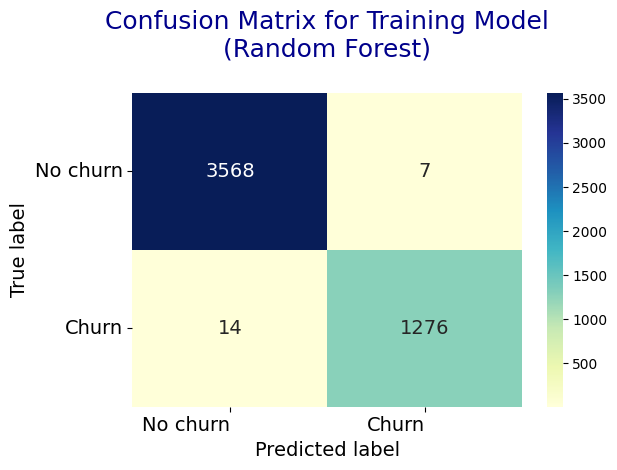

In [15]:
# Menampilkan Plots

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Performansi Model Testing

In [16]:
# Menampilkan metrics

# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print("Classification Report Testing Model (Random Forest Classifier)")
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier)
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.59      0.48      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085



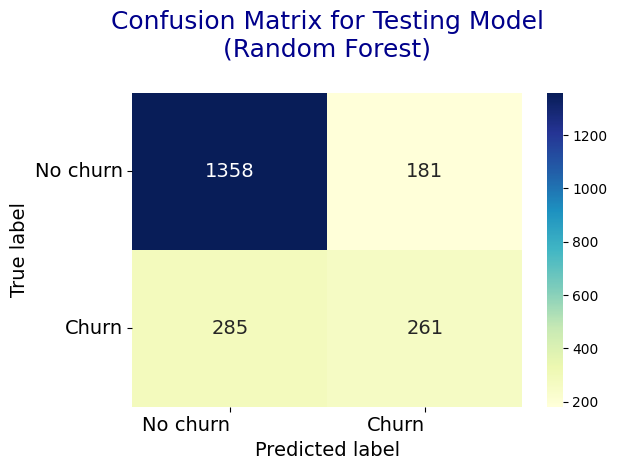

In [17]:
# Menampilkan Plots

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan churn yang sebenernya benar churn adalah 1276, tebakan tidak churn yang sebenernya tidak churn adalah 3568, tebakan tidak churn yang sebenernya benar churn adalah 14 dan tebakan churn yang sebenernya tidak churn adalah 7.

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1358, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 181.

## Modelling: Gradient Boosting Classifier

In [18]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


### Performansi Model Training

In [19]:
# Menampilkan Metrics

# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print("Classification Report Training Model (Gradient Boosting)")
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting)
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



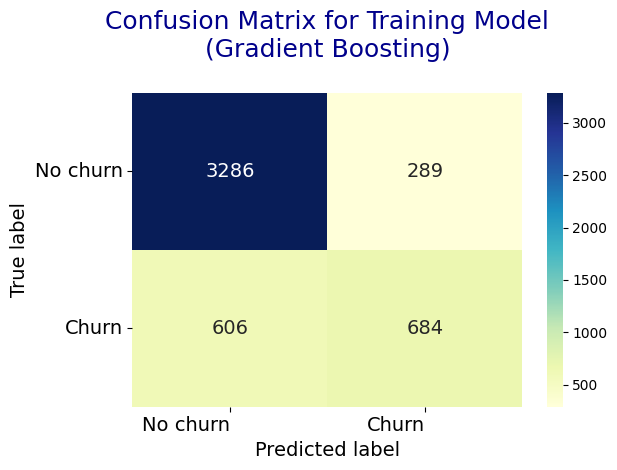

In [20]:
# Menampilkan Plots

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [21]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print("Classification Report Testing Model (Gradient Boosting)")
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting)
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



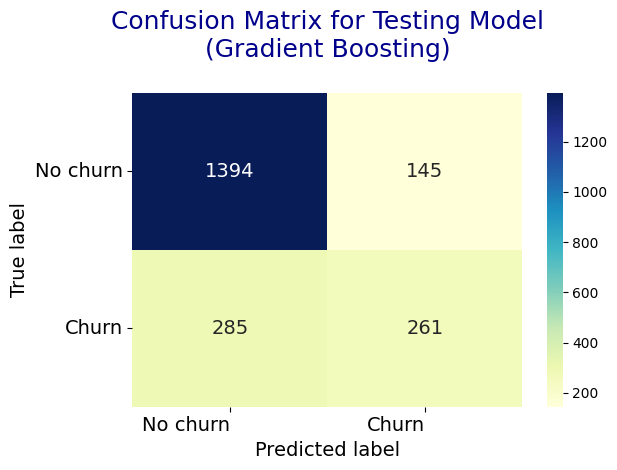

In [22]:
# Menampilkan Plots

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan churn yang sebenernya benar churn adalah 684, tebakan tidak churn yang sebenernya tidak churn adalah 3286, tebakan tidak churn yang sebenernya benar churn adalah 606 dan tebakan churn yang sebenernya tidak churn adalah 289.

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1394, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 145.

## Pemilihan model terbaik

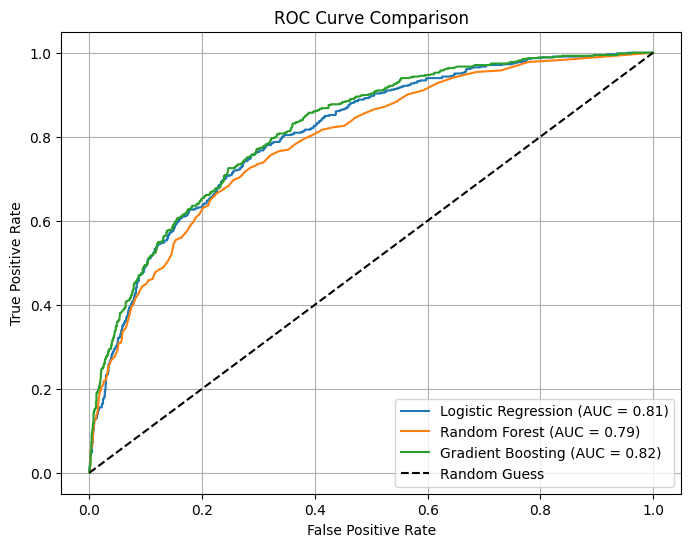

In [23]:
from sklearn.metrics import roc_curve, auc
# Probabilitas prediksi kelas 1 (positif/churn)
log_proba = log_model.predict_proba(x_test)[:, 1]
rdf_proba = rdf_model.predict_proba(x_test)[:, 1]
gbt_proba = gbt_model.predict_proba(x_test)[:, 1]

# ROC dan AUC untuk setiap model
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
auc_log = auc(fpr_log, tpr_log)

fpr_rdf, tpr_rdf, _ = roc_curve(y_test, rdf_proba)
auc_rdf = auc(fpr_rdf, tpr_rdf)

fpr_gbt, tpr_gbt, _ = roc_curve(y_test, gbt_proba)
auc_gbt = auc(fpr_gbt, tpr_gbt)

plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %0.2f)' % auc_log)
plt.plot(fpr_rdf, tpr_rdf, label='Random Forest (AUC = %0.2f)' % auc_rdf)
plt.plot(fpr_gbt, tpr_gbt, label='Gradient Boosting (AUC = %0.2f)' % auc_gbt)

# Garis random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [26]:
# Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, log_model.predict(x_test)))

# Random Forest
print("Random Forest:")
print(classification_report(y_test, rdf_model.predict(x_test)))

# Gradient Boosting
print("Gradient Boosting:")
print(classification_report(y_test, gbt_model.predict(x_test)))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085

Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.59      0.48      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       

In [25]:
# Training vs Testing Accuracy
print("Logistic Regression: Train =", accuracy_score(y_train, log_model.predict(x_train)),
      "Test =", accuracy_score(y_test, log_model.predict(x_test)))

print("Random Forest: Train =", accuracy_score(y_train, rdf_model.predict(x_train)),
      "Test =", accuracy_score(y_test, rdf_model.predict(x_test)))

print("Gradient Boosting: Train =", accuracy_score(y_train, gbt_model.predict(x_train)),
      "Test =", accuracy_score(y_test, gbt_model.predict(x_test)))

Logistic Regression: Train = 0.7950668036998972 Test = 0.7937649880095923
Random Forest: Train = 0.99568345323741 Test = 0.7764988009592326
Gradient Boosting: Train = 0.816032887975334 Test = 0.7937649880095923


Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.

Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.

Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.

Metrik Evaluasi model :
1. Nilai AUC paling tinggi
2. Nilai F1 paling tinggi
3. Akurasi Training vs Testing tidak jomplang

Untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.

## Feature Importance

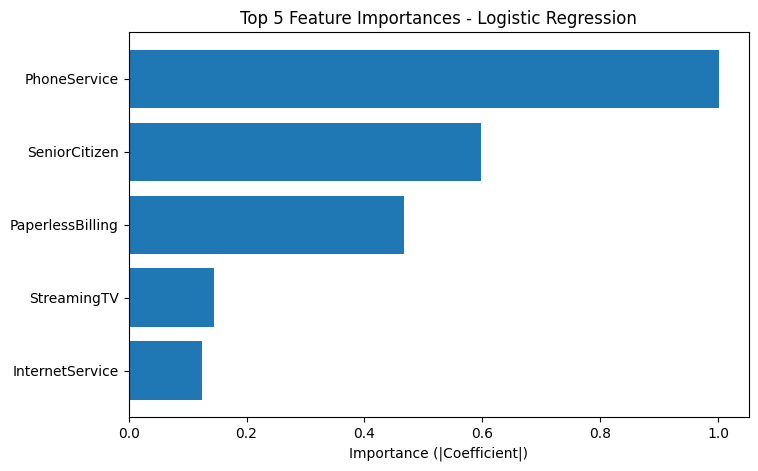

In [27]:
# Ambil koefisien model
coefficients = log_model.coef_[0]

# Buat DataFrame untuk importance
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)  # pakai nilai absolut
})

# Urutkan berdasarkan importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Ambil top 5
top_5 = feature_importance.head(5)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(top_5['Feature'], top_5['Importance'])
plt.xlabel('Importance (|Coefficient|)')
plt.title('Top 5 Feature Importances - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

Variabel yang paling berpengaruh terhadap model logistic regression yaitu PhoneService dan SeniorCitizen